In [51]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import FastICA
from sklearn.manifold import LocallyLinearEmbedding 
import os

In [52]:
outdir = './data/processed_data'

In [53]:
 # read X_train and y_train data from the file
  
X_train = pd.read_csv(os.path.join(outdir, f"diabetes_data_train.csv" ) )
y_train_true = pd.read_csv(os.path.join(outdir, f"diabetes_data_train_labels.csv" ) )
X_test = pd.read_csv(os.path.join(outdir, f"diabetes_data_test.csv" ) )
y_test_true = pd.read_csv(os.path.join(outdir, f"diabetes_data_test_labels.csv" ) )

In [54]:
print(X_train.shape)
print(y_train_true.shape)

(183824, 21)
(183824, 1)


## MLPCLassfier from Assignment 1

In [10]:
nn_clf = MLPClassifier(hidden_layer_sizes= (200,150,100), activation= 'tanh', learning_rate='adaptive', random_state=200)

In [14]:
%% time 
nn_clf.fit(X_train,y_train_true)

MLPClassifier(activation='tanh', hidden_layer_sizes=(200, 150, 100),
              learning_rate='adaptive', random_state=200)

In [17]:
y_pred = nn_clf.predict(X_test)
nn_f1_score = f1_score(y_test_true,y_pred,average='weighted')
print(nn_f1_score)

0.791513600553983


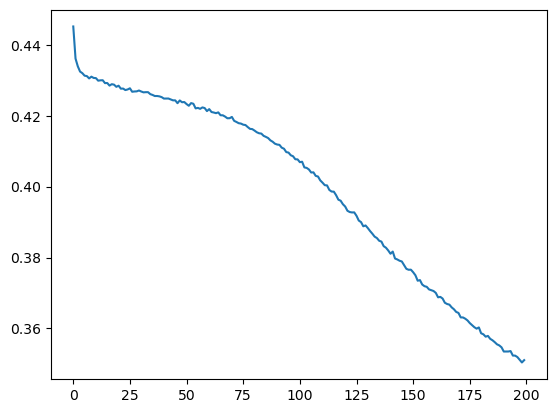

In [24]:
plt.plot(nn_clf.loss_curve_)

## MLPClassifier on Dimensionality Reducded Dataset using ICA  

In [55]:
X_ica_train = pd.read_csv(os.path.join(outdir, f"reduced_diabetes_ica.csv" ) )
X_ica_train.shape

(183824, 3)

In [56]:
X_ica_train.head()

,0,1,2
0,-0.518626,-0.446083,2.482518
1,0.245642,0.175031,0.189318
2,-0.030732,0.133750,-1.297022
3,-0.539829,-0.289458,0.521355
4,-0.342902,0.831816,0.479536


In [28]:
parameters_list = {'hidden_layer_sizes' : [(100), (150), (200)], 
                  'activation' : ['tanh','relu'], 
                  'learning_rate' : ['constant', 'adaptive', 'invscaling']}
#plot_vaidation_curve(nn_clf, X_train, y_train, "hidden_layer_sizes", hidden_layer_sizes)
grid = GridSearchCV(nn_clf, 
                   param_grid = parameters_list,
                   cv = 10, 
                   verbose = 1, n_jobs = -1)

In [30]:
%%time 
grid.fit(X_ica_train, y_train_true)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
CPU times: total: 24.7 s
Wall time: 55min 57s


GridSearchCV(cv=10,
             estimator=MLPClassifier(activation='tanh',
                                     hidden_layer_sizes=(200, 150, 100),
                                     learning_rate='adaptive',
                                     random_state=200),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [100, 150, 200],
                         'learning_rate': ['constant', 'adaptive',
                                           'invscaling']},
             verbose=1)

In [31]:
grid.best_estimator_.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 200,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 200,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [32]:
nn_ica_clf = MLPClassifier(hidden_layer_sizes= (200,), activation= 'relu', learning_rate='constant', random_state=200)

In [57]:
%%time 
nn_ica_clf.fit(X_ica_train,y_train_true)

CPU times: total: 15.6 s
Wall time: 17.5 s


MLPClassifier(hidden_layer_sizes=(200,), random_state=200)

### Reduce the dimensions of  X_test using ICA

In [59]:
ica = FastICA(n_components = 3, random_state = 42)
X_test_reduced = ica.fit_transform(X_test)
X_test_reduced.shape

(45957, 3)

0.7583426611560176


Text(0.5, 1.0, 'Loss Curve for ICA Reduced dataset')

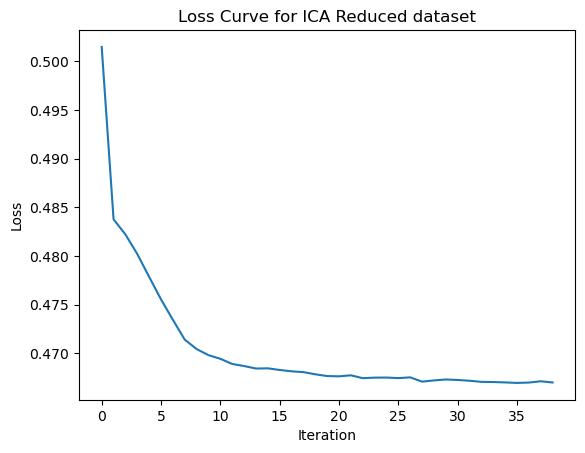

In [62]:
ica_y_pred = nn_ica_clf.predict(X_test_reduced)
ica_f1_score = f1_score(y_test_true,ica_y_pred,average='weighted')
print(ica_f1_score)
plt.plot(nn_ica_clf.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Curve for ICA Reduced dataset")

## MLPClassifier on Dimensionality Reducded Dataset using

In [65]:
X_lle_train = pd.read_csv(os.path.join(outdir, f"reduced_diabetes_lle.csv" ) )
X_lle_train.shape

(20000, 10)

In [66]:
X_lle_train.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.004330,0.000283,0.001931,-0.002964,0.001534,0.003536,0.005352,0.008611,-0.004763,0.004263
1,-0.002280,-0.001827,-0.000134,0.000602,0.000836,-0.002183,0.001456,-0.000168,-0.003609,-0.000429
2,-0.000548,0.002077,-0.006762,0.009346,0.000691,0.002363,0.002845,0.001106,-0.003255,-0.006320
3,-0.001182,-0.002523,-0.000698,-0.000144,-0.001522,0.000210,-0.001065,0.003321,-0.004701,0.002693
4,-0.007806,0.001575,-0.005041,0.003860,-0.000627,0.006778,-0.002331,0.010150,0.001763,0.004709


### Hyperparameter tuning

In [41]:
parameters_list = {'hidden_layer_sizes' : [(50), (100), (150)], 
                  'activation' : ['tanh','relu'], 
                  'learning_rate' : ['constant', 'adaptive', 'invscaling'],
                  'solver': ['lbfgs', 'sgd', 'adam']}
#plot_vaidation_curve(nn_clf, X_train, y_train, "hidden_layer_sizes", hidden_layer_sizes)
grid = GridSearchCV(nn_clf, 
                   param_grid = parameters_list,
                   cv = 10, 
                   verbose = 1, n_jobs = -1)

In [43]:
%%time 
grid.fit(X_lle_train, y_train_true[:20000])

Fitting 10 folds for each of 54 candidates, totalling 540 fits
CPU times: total: 14.3 s
Wall time: 8min 54s


GridSearchCV(cv=10,
             estimator=MLPClassifier(activation='tanh',
                                     hidden_layer_sizes=(200, 150, 100),
                                     learning_rate='adaptive',
                                     random_state=200),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [50, 100, 150],
                         'learning_rate': ['constant', 'adaptive',
                                           'invscaling'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             verbose=1)

In [44]:
grid.best_estimator_.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 50,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 200,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [67]:
nn_lle_clf = MLPClassifier(hidden_layer_sizes= (50,), activation= 'relu', learning_rate='constant', random_state=200)

In [68]:
%%time 
nn_lle_clf.fit(X_lle_train,y_train_true[:20000])

CPU times: total: 1.58 s
Wall time: 1.73 s


MLPClassifier(hidden_layer_sizes=(50,), random_state=200)

### Reduce the dimensions of  X_test using LLE### Reduce the dimensions of  X_test using LLE

In [69]:
%%time
lle = LocallyLinearEmbedding(n_components=10, n_neighbors=5, eigen_solver='dense') 
X_test_reduced = lle.fit_transform(X_test[:20000]) 
X_test_reduced.shape

CPU times: total: 1h 56s
Wall time: 10min 5s


(20000, 10)

0.7572110139485463


Text(0.5, 1.0, 'Loss Curve for Manifold Reduced dataset')

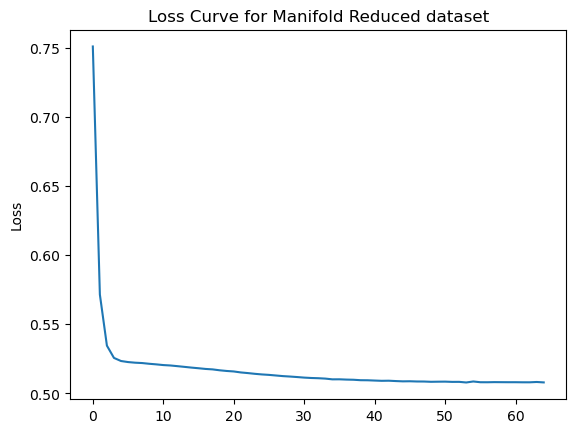

In [70]:
lle_y_pred = nn_lle_clf.predict(X_test_reduced)
lle_f1_score = f1_score(y_test_true[:20000],lle_y_pred,average='weighted')
print(lle_f1_score)
plt.plot(nn_lle_clf.loss_curve_)
plt.ylabel("Loss")
plt.title("Loss Curve for Manifold Reduced dataset")